### Problem Statement:

**The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. 
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.**

### Importing Required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PowerTransformer
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import xgboost as xgb
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Reading Data

In [2]:
df = pd.read_csv(r"C:\Users\Kushal Arya\Desktop\Data Analysis With Python\ML Files\bigdatamart_Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Check no of row and column

In [3]:
print('No of Rows and Columns ----->', df.shape )

No of Rows and Columns -----> (8523, 12)


### Checking for Null values

In [4]:
print('----------------------\n')
print(df.isnull().sum())
print('\n----------------------')

----------------------

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

----------------------


#### There is Item weight and Outlet size has Nan value

### Removing Nan Value

In [5]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

#### We remove all nan on those features

### Checking for Null values remove or not

In [6]:
print('----------------------\n')
print(df.isnull().sum())
print('\n----------------------')

----------------------

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

----------------------


In [7]:
print('No of Rows and Columns Left After Removing NaN ----->', df.shape )

No of Rows and Columns Left After Removing NaN -----> (8523, 12)


### Information about dataset

In [8]:
print('----------------------------------------------------\n')
print(df.info())
print('\n----------------------------------------------------')

----------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 7

#### Some features are in float and some are in object 

### Droping Unwanted Column

In [9]:
col = ['Item_Identifier','Outlet_Identifier']

In [10]:
df = df.drop(columns = col, axis = 1)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
print('No of Rows and Columns ----->', df.shape )

No of Rows and Columns -----> (8523, 10)


### Analysis of data

In [12]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [13]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [14]:
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [15]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [16]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [17]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
2004     930
1997     930
1999     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

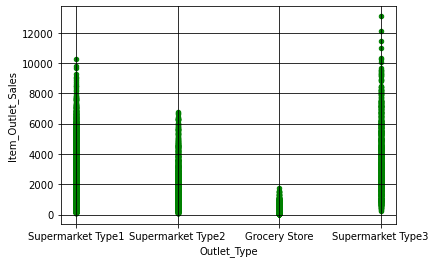

In [18]:
df.plot.scatter('Outlet_Type','Item_Outlet_Sales', c = 'g')
plt.grid(which = 'major', c = 'black')
plt.show()

#### Supermarket Type3 highest sales

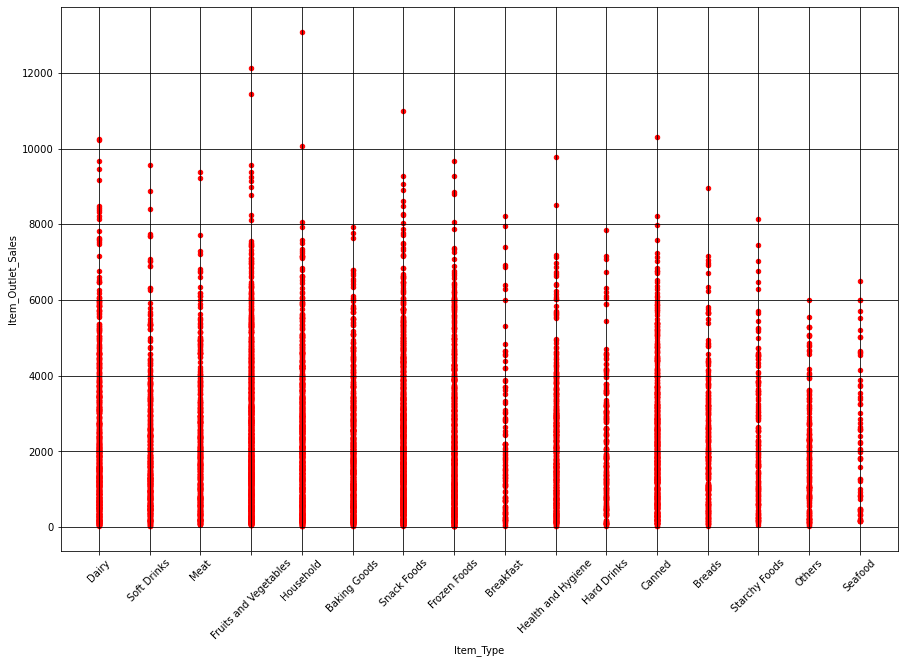

In [19]:
df.plot.scatter('Item_Type','Item_Outlet_Sales', figsize = (15,10), rot = 45, c = 'r', facecolor = 'y')
plt.grid(which = 'major', c = 'black')
plt.show()

#### Household products sales higest and other products least sales

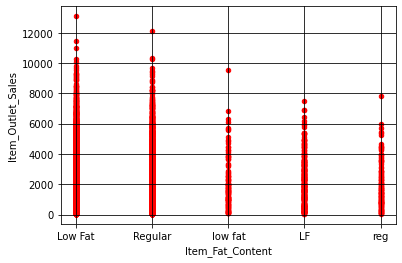

In [20]:
df.plot.scatter('Item_Fat_Content','Item_Outlet_Sales', c = 'r')
plt.grid(which = 'major', c = 'black')
plt.show()

#### Low fat content sales higest among all and LF is least

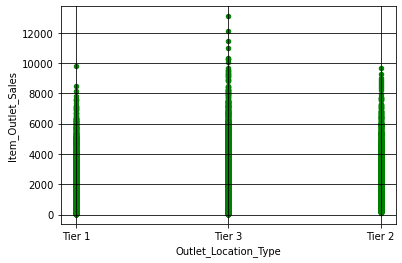

In [21]:
df.plot.scatter('Outlet_Location_Type','Item_Outlet_Sales', c = 'g')
plt.grid(which = 'major', c = 'black')
plt.show()

#### Tier 3 cites sales highest and Tier 2 sales lowest.

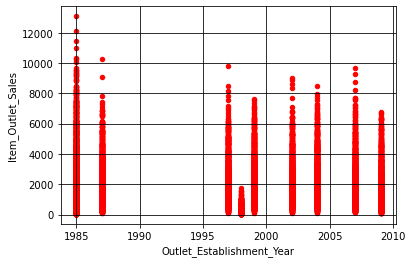

In [22]:
df.plot.scatter('Outlet_Establishment_Year','Item_Outlet_Sales', c = 'r')
plt.grid(which = 'major', c = 'black')
plt.show()

#### Older oulets sales higher compare to newly open outlets

In [23]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [24]:
df['No_of_years_outlet_open'] = [2021] - df['Outlet_Establishment_Year']
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,No_of_years_outlet_open
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,12
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800,23
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052,34


#### Convert Outlet establishment year into No of years outlets open because it esaier to incode

In [25]:
print('----------------------------------------------------\n')
print(df.info())
print('\n----------------------------------------------------')

----------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
 10  No_of_years_outlet_open    8523 non-null   int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 732.6+ KB
None

-----------------------------------------

In [26]:
df = df.drop('Outlet_Establishment_Year', axis = 1)
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,No_of_years_outlet_open
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,22
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,12
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,22
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,23
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,34


#### Drop Outlet establishment year

### Spliting data into features and label

In [27]:
x = df.drop('Item_Outlet_Sales', axis = 1)
y = df['Item_Outlet_Sales']
print('Data has been splited')

Data has been splited


### Filter Categorical features

In [28]:
numerics = ['int64', 'float64']
categorical_col = []
features = x.columns.values.tolist()
for col in features:
    if x[col].dtype in numerics:
        continue
    categorical_col.append(col)

### Encoding categorical columns using get dummies

In [29]:
x_dummies = pd.get_dummies(x[categorical_col], drop_first = True)
x_dummies.head()


,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [30]:
x_dummies.shape

(8523, 26)

In [31]:
x = x.join(x_dummies)

In [32]:
x.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,No_of_years_outlet_open,Item_Fat_Content_Low Fat,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,22,1,...,0,0,0,1,0,0,0,1,0,0
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,12,0,...,0,1,0,1,0,0,1,0,1,0
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,22,1,...,0,0,0,1,0,0,0,1,0,0
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,23,0,...,0,0,0,1,0,0,1,0,0,0
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,34,1,...,0,0,0,0,0,0,1,1,0,0


In [33]:
x.drop(columns = categorical_col, axis = 1, inplace = True)

In [34]:
x.head()

,Item_Weight,Item_Visibility,Item_MRP,No_of_years_outlet_open,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,22,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,12,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,17.50,0.016760,141.6180,22,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,23,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,8.93,0.000000,53.8614,34,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


### Checking Outliers

---------------------
Distribution Plot :- 
---------------------


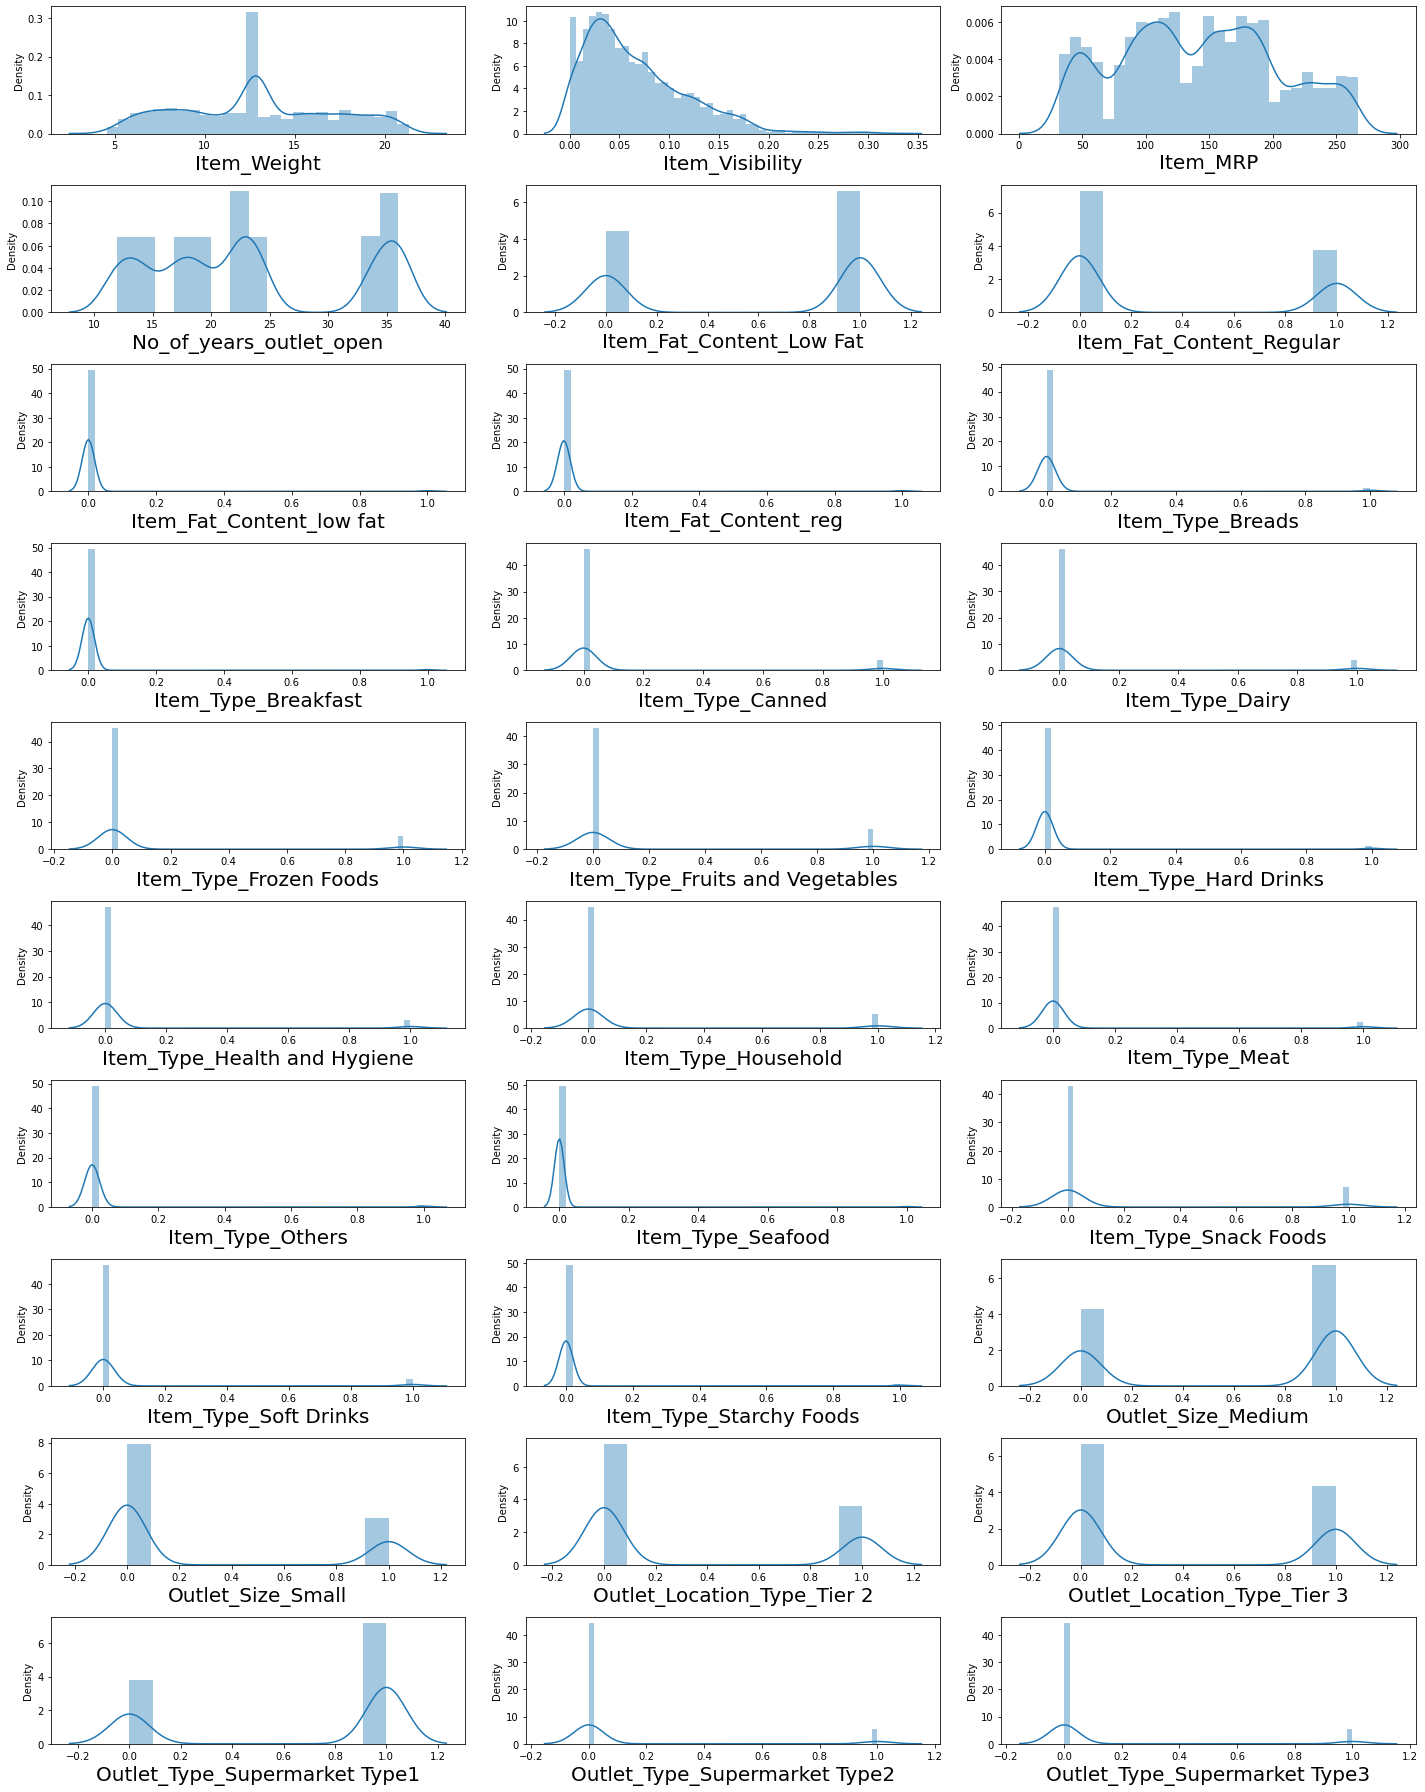

In [35]:
print('---------------------')
print('Distribution Plot :- ')
print('---------------------')
      
plt.figure(figsize = (20,25))
plotnumber = 1

for column in x:
    if plotnumber <=30:
        ax = plt.subplot(10,3, plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

#### Some outliers present in columns

### Power Transformer to remove outliers

In [36]:
scaler = PowerTransformer(method = 'yeo-johnson')
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.82263635, -1.14688621,  1.62367023, ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.73380133, -1.03709991, -1.59501643, ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 1.08636176, -1.12237453,  0.08123678, ...,  0.72680189,
        -0.34955064, -0.35102831],
       ...,
       [-0.49655592, -0.54297932, -0.86792986, ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.37344321,  1.45998957, -0.54899589, ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 0.49178563, -0.27619496, -1.04722682, ...,  0.72680189,
        -0.34955064, -0.35102831]])

### Checking Outlier remove or not

---------------------
Distribution Plot :- 
---------------------


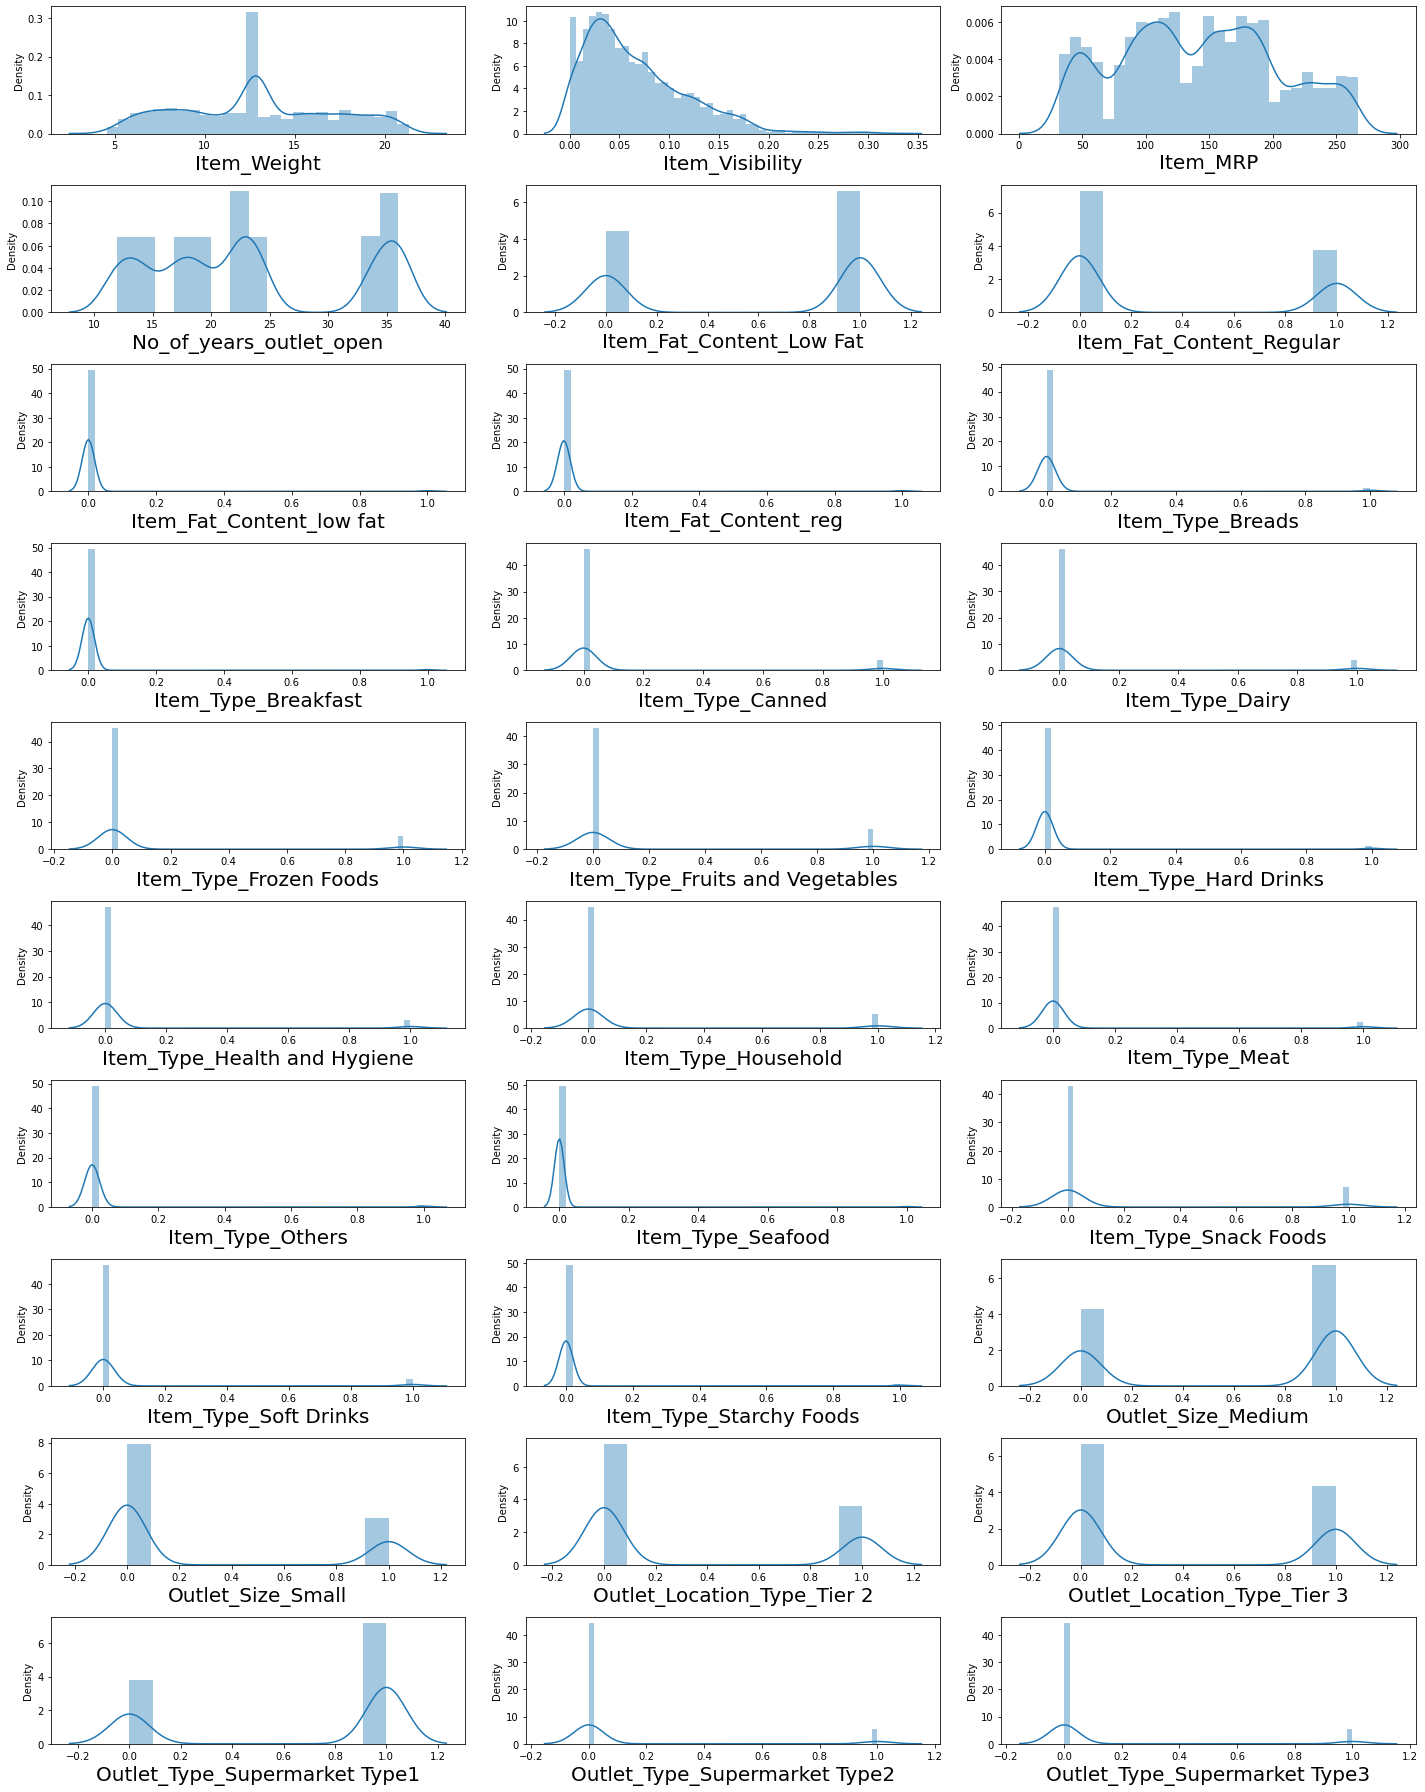

In [37]:
print('---------------------')
print('Distribution Plot :- ')
print('---------------------')
      
plt.figure(figsize = (20,25))
plotnumber = 1

for column in x:
    if plotnumber <=30:
        ax = plt.subplot(10,3, plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber +=1
plt.tight_layout()

#### Outliers are removed

### Split data into train and test. Model will be bulit on training data and tested on test data

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 355)
print('Data has been splited.')

Data has been splited.


## Model Building

### Xgboost model instantiaing, training and evaluating

In [39]:
xgb = xgb.XGBRegressor()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

In [40]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', xgb.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.5294371130690214
RMSE of Model -------> 1163.248310421678
MSE of Model -------> 1353146.631698889
Score of test data ----> 0.5294371130690214


### Conclusion : XGBoost model has 52% score

### Knn model instantiaing, training and evaluating

In [41]:
Knn = KNeighborsRegressor()
Knn.fit(x_train, y_train)
y_pred = Knn.predict(x_test)

In [42]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', Knn.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.42296758232174914
RMSE of Model -------> 1288.1418819087874
MSE of Model -------> 1659309.5079275125
Score of test data ----> 0.42296758232174914


### Conclusion : Knn model has 42% score

### Decision Tree model instantiaing, training and evaluating

In [43]:
DT = DecisionTreeRegressor()
DT.fit(x_train, y_train)
y_pred = DT.predict(x_test)

In [44]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', DT.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.17620759508520245
RMSE of Model -------> 1539.1200169339468
MSE of Model -------> 2368890.4265267523
Score of test data ----> 0.17620759508520245


### Conclusion : Decision Tree model has 19% score

### Random Forest model instantiaing, training and evaluating

In [45]:
Rn = RandomForestRegressor()
Rn.fit(x_train, y_train)
y_pred = Rn.predict(x_test)

In [46]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', Rn.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.5658710564717431
RMSE of Model -------> 1117.3081464916793
MSE of Model -------> 1248377.4942166717
Score of test data ----> 0.5658710564717431


### Conclusion : Random Forest model has 56% score

### SVM model instantiaing, training and evaluating

In [47]:
svr = SVR()
svr.fit(x_train, y_train)
y_pred = svr.predict(x_test)

In [48]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', svr.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.17505733672176238
RMSE of Model -------> 1540.1941759675528
MSE of Model -------> 2372198.0996843693
Score of test data ----> 0.17505733672176238


### Conclusion : SVM model has 17% score

### Linear Regression model instantiaing, training and evaluating

In [49]:
Lr = LinearRegression()
Lr.fit(x_train, y_train)
y_pred = Lr.predict(x_test)

In [50]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', Lr.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.5761275930961476
RMSE of Model -------> 1104.0307445061003
MSE of Model -------> 1218883.884814694
Score of test data ----> 0.5761275930961476


### Conclusion : Linear Regression model has 57% score


### Looking R2 score we found Linear Regression has best model so we do Hyperparameter Tuning on it.

In [51]:
param_grid = {'fit_intercept' : [True, False],'normalize' : [True, False],'copy_X':[True, False],
             'positive':[True, False]}

In [52]:
grid_search = GridSearchCV(estimator = Lr, param_grid = param_grid, cv = 5,n_jobs = -1 )

In [53]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [54]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'copy_X': True, 'fit_intercept': False, 'normalize': True, 'positive': False}


In [55]:
hlr = LinearRegression(copy_X = True, fit_intercept = False, normalize = True, positive = False)
hlr.fit(x_train, y_train)
hlr.score(x_test, y_test)

0.5761141582584479

In [56]:
y_pred = hlr.predict(x_test)

In [57]:
print('=========================================================')
print('R2 Score ----->', r2_score(y_test, y_pred))
print('=========================================================')
print('RMSE of Model ------->', np.sqrt(mean_squared_error(y_test, y_pred)))
print('=========================================================')
print('MSE of Model ------->', mean_squared_error(y_test, y_pred))
print('=========================================================')
print('Score of test data ---->', Lr.score(x_test, y_test))
print('=========================================================')

R2 Score -----> 0.5761141582584479
RMSE of Model -------> 1104.0482407574457
MSE of Model -------> 1218922.5179196107
Score of test data ----> 0.5761275930961476


#### After Hyperparameter Tuning model accuracy score 57%.

### Saving The Model

In [58]:
# saving the model to the Local file system
filename = 'Big Data Mart Sales Train.pickle'
pickle.dump(hlr, open(filename, 'wb'))

## Final Conclusion : LinearRegression is our best model.